# Варченко Кирилл, Модульная домашняя работа №1, анализ данных

**Вариант 1**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [104]:
data = pd.read_csv('var_1.csv', index_col=0)

## Общий осмотр и описательные статистики

### Боксплоты по каждой переменной

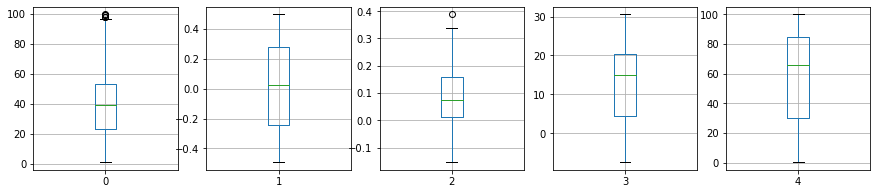

In [58]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    data.boxplot(str(i), ax=ax[i])
plt.show()

## Описательные статистики

In [24]:
data.describe()

,0,1,2,3,4
count,488.000000,488.000000,488.000000,488.000000,488.000000
mean,40.166645,0.020237,0.083217,12.419801,56.711008
std,21.442002,0.296207,0.093109,8.963220,30.306716
min,0.897330,-0.492822,-0.154499,-7.559190,0.225884
25%,23.465476,-0.245057,0.011380,4.263021,30.000483
50%,39.333600,0.026570,0.075701,15.044415,66.092733
75%,52.987725,0.280456,0.156963,20.287007,84.830630
max,99.735737,0.496544,0.389299,30.619678,99.989531


## Гистрограммы и скаттерплоты

Гистограммы по каждой переменной находятся на главной диагонали, вне неё - скаттерплоты по каждой паре переменных.

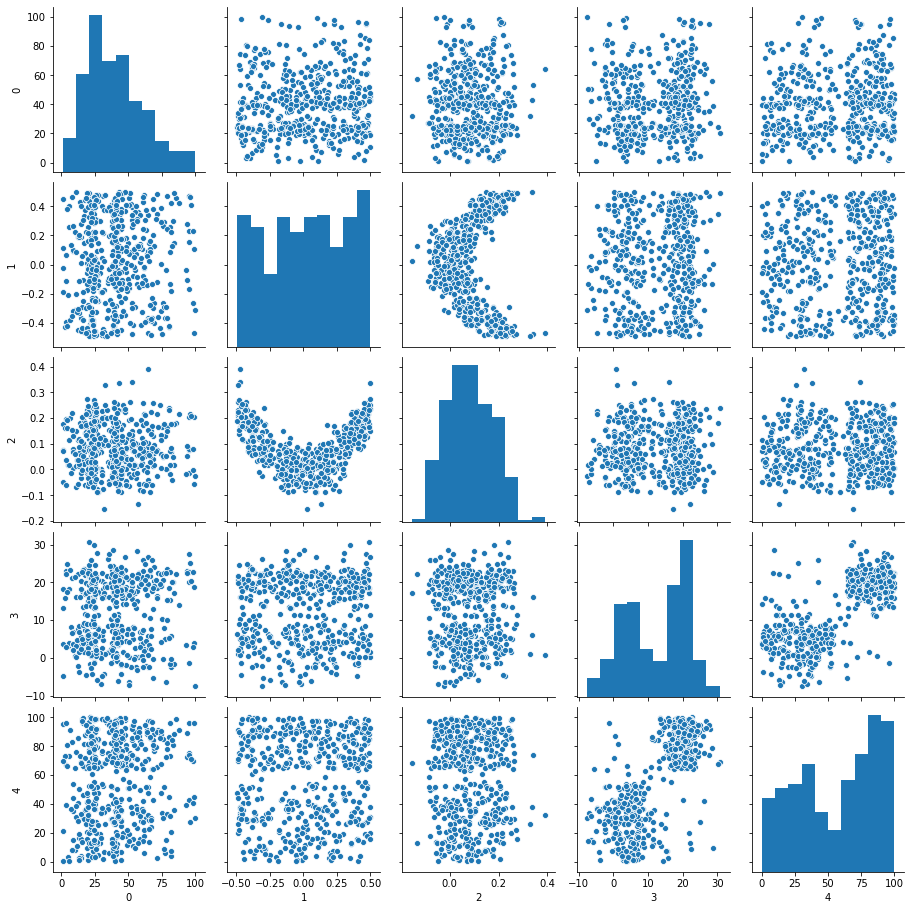

In [26]:
sns.pairplot(data)

- Переменная 0 имеет несимметричное распределение.
- Из скаттерплота по переменным 1 и 2 можно предположить наличие нелинейной зависимости между ними. 
- Из гистрограммы по переменной 1 можно предположить, что на распределена равномерно, предположительно на интервале [-0.5, 0.5] (минимум и максимум из описательных статистик по этой переменной).
- Гистограммы для переменной 3 и 4 бимодальные и все скаттерплоты, в которых участвуют эти переменные (одна или обе) визуально показывают хорошую линейную разделимость на два кластера.

## Проверка предположений

### Коэффициент асимметрии переменной 0

In [145]:
stats.skew(data['0'])

0.6347386460099355

### Зависимость между 1 и 2

Из скаттерплота по 1 и 2 переменной можно предположить, что они связаны квадратичной зависимостью $x_2 \sim x_1^2$. Проверим это по скаттерплоту с линией регрессии (показано красным) между $x_1^2$ и $x_2$.

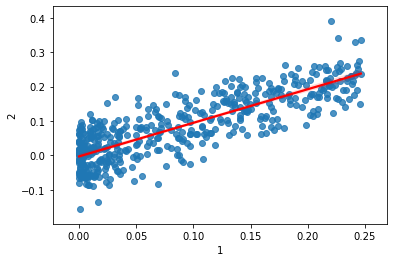

In [36]:
sns.regplot(data['1']**2, data['2'], line_kws={'color': 'red'})

In [40]:
r, p = stats.pearsonr(data['1']**2, data['2'])
print(f'Коэф. корреляции = {r:.3f} (p={p})')

Коэф. корреляции = 0.825 (p=1.5899737831971917e-122)


Найдём коэффициенты линейной регрессии

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
stats.linregress(data['1']**2, data['2'])

LinregressResult(slope=0.9751932046340905, intercept=-0.002569864242387518, rvalue=0.8249729905068393, pvalue=1.589973783191346e-122, stderr=0.030304949077746727)

Получаем
$$x_2 = 0.9752x_1^2 - 0.0026$$

### Распределение переменной 1

Мы предположили, что 1 переменная распределена как $U(-0.5,0.5)$. Проверим это с помощью теста Колмогорова-Смирнова.

In [86]:
kstest(data['1'], stats.uniform(loc=-0.5, scale=1).cdf) 

KstestResult(statistic=0.048523511424622634, pvalue=0.19448575370015522)

Т.к. p > 0.05, то мы не можем отвергнуть нулевую гипотезу о совпадении распределений.

### Кластеризация

Выполним скалирование данных с помощью стандартного скейлера и кластеризуем на два кластера. Ниже приведены скаттерплоты с обозначением полученных кластеров разными цветами.

In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [109]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)
km = KMeans(n_clusters=2)
clusters = km.fit_predict(scaled_data)
data['cluster'] = clusters.astype(str)

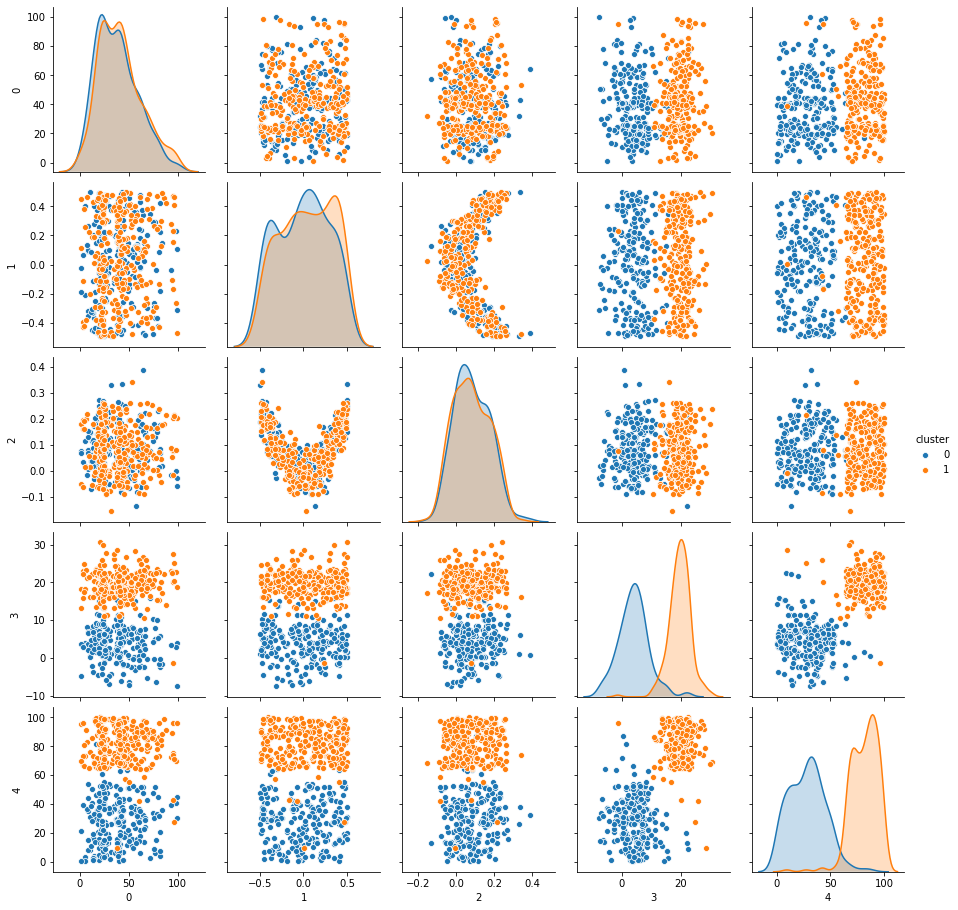

In [68]:
sns.pairplot(data, hue='cluster')

Как видно, данные действительно хорошо кластеризовались. Гистограммы (эмпирические плотности) для переменных 3 и 4 визуально разделяются на смесь двух. Описательные статистики для 3 и 4 по каждому кластеру:

In [115]:
data.loc[data['cluster'] == '0', ['3', '4']].describe()

,3,4
count,259.000000,259.000000
mean,19.771301,81.650165
std,3.643605,12.536195
min,-1.249476,9.440255
25%,17.748380,72.844346
50%,19.986894,83.370614
75%,22.042456,91.306087
max,30.619678,99.989531


In [116]:
data.loc[data['cluster'] == '1', ['3', '4']].describe()

,3,4
count,229.000000,229.000000
mean,4.105223,28.504712
std,5.074559,16.686272
min,-7.559190,0.225884
25%,1.023299,15.138933
50%,4.024498,29.298031
75%,6.865127,39.035313
max,22.471114,86.895899


# Выводы

1. Переменная 0 имеет несимметричное распределение с коэф. асимметрии 0.63 и выборочной медианой 39.3.
1. Переменные 1 и 2 связаны квадратичной зависимостью $x_2 = 0.9752x_1^2 - 0.0026$
2. Переменная 1, вероятно, получена из равномерного распределения $U(-0.5,0.5)$ (если это данные с датчика, то он может быть неисправен или неподключен).
3. Переменные 3 и 4 разделяются на два кластера (если это данные с датчика, то они могут быть связаны с двумя состояниями объекта) со средними значениями $(\bar x_3=19.77,\bar x_4=81.65)$ и $(\bar x_3=4.11,\bar x_4=28.5)$